# 1. IMPORT LIBRARY DAN LOAD DATASET


In [80]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/1pTxLZfxc_0u8qGPsimdJAsDSSMwTPwkwcvX4YCvefhk/export?format=csv&gid=730194773"

df = pd.read_csv(url)
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [81]:
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")


Status unique values: ['D' 'C' 'CL']
Drug unique values: ['D-penicillamine' 'Placebo' nan]
Sex unique values: ['F' 'M']
Ascites unique values: ['Y' 'N' nan]
Hepatomegaly unique values: ['Y' 'N' nan]
Spiders unique values: ['Y' 'N' nan]
Edema unique values: ['Y' 'N' 'S']


In [82]:
numerical_cols = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos',
                  'SGOT','Tryglicerides','Platelets','Prothrombin','Stage']

for col in numerical_cols:
    print(f"{col} min: {df[col].min()}, max: {df[col].max()}")


N_Days min: 41, max: 4795
Age min: 9598, max: 28650
Bilirubin min: 0.3, max: 28.0
Cholesterol min: 120.0, max: 1775.0
Albumin min: 1.96, max: 4.64
Copper min: 4.0, max: 588.0
Alk_Phos min: 289.0, max: 13862.4
SGOT min: 26.35, max: 457.25
Tryglicerides min: 33.0, max: 598.0
Platelets min: 62.0, max: 721.0
Prothrombin min: 9.0, max: 18.0
Stage min: 1.0, max: 4.0


# 2. PREPROCESSING DATA

### 2.1. Menghapus kolom yang tidak diperlukan

In [52]:
df = df.drop(columns=["ID", "Stage"])

### 2.2. Mencari dan Menangani Missing Value

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
dtypes: float64

In [54]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
dtype: int64

In [55]:
##### MENANGANI MISSING VALUE DENGAN MEDIAN DAN MODUS ########
# 1. Kolom kategorikal
categorical_cols = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])   # isi dengan modus

# 2. Kolom numerik
numeric_cols = ["Cholesterol", "Copper", "Alk_Phos", "SGOT",
                "Tryglicerides", "Platelets", "Prothrombin"]

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())   # isi dengan modus

In [56]:
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

### 2.4. Menghapus Data Duplikat

In [57]:
df = df.drop_duplicates()

### 2.5. Encoding Label atau Variabel Kategorikal

In [58]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = label_encoder.fit_transform(df[col])
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


### 2.6 Mengatasi Imbalanced Data

In [59]:
print(df["Status"].value_counts())

Status
0    232
2    161
1     25
Name: count, dtype: int64


In [60]:
X = df.drop("Status", axis=1)
y = df["Status"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Sebelum:", y.value_counts())
print("Sesudah:", y_res.value_counts())

Sebelum: Status
0    232
2    161
1     25
Name: count, dtype: int64
Sesudah: Status
2    232
0    232
1    232
Name: count, dtype: int64


In [61]:
print(X_res.info())
print(y_res.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         696 non-null    int64  
 1   Drug           696 non-null    int32  
 2   Age            696 non-null    int64  
 3   Sex            696 non-null    int32  
 4   Ascites        696 non-null    int32  
 5   Hepatomegaly   696 non-null    int32  
 6   Spiders        696 non-null    int32  
 7   Edema          696 non-null    int32  
 8   Bilirubin      696 non-null    float64
 9   Cholesterol    696 non-null    float64
 10  Albumin        696 non-null    float64
 11  Copper         696 non-null    float64
 12  Alk_Phos       696 non-null    float64
 13  SGOT           696 non-null    float64
 14  Tryglicerides  696 non-null    float64
 15  Platelets      696 non-null    float64
 16  Prothrombin    696 non-null    float64
dtypes: float64(9), int32(6), int64(2)
memory usage: 76.3 K

# 3. MODELING DAN EVALUASI C4.5 TUNGGAL

In [62]:
feature_names = X_res.columns.tolist()
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi list untuk menyimpan hasil dari 10 fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
fold_confusions = []
fold_results_strings = [] # LIST BARU: Untuk menyimpan string hasil per fold

# Untuk confusion matrix keseluruhan (akumulatif)
all_true = []
all_pred = []
representative_model = None

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_res), 1):

    X_train, X_test = X_res.iloc[train_idx], X_res.iloc[test_idx]
    y_train, y_test = y_res.iloc[train_idx], y_res.iloc[test_idx]

    # C4.5 Decision Tree (entropy)
    model = DecisionTreeClassifier(criterion="entropy", random_state=fold)
    model.fit(X_train, y_train)

    # Simpan model Fold 1 sebagai representasi
    if fold == 1:
        representative_model = model
        X_train_fold1 = X_train
        y_train_fold1 = y_train

    # Prediksi
    final_pred = model.predict(X_test)

    # Evaluasi Fold
    acc = accuracy_score(y_test, final_pred)
    prec = precision_score(y_test, final_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, final_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, final_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, final_pred)

    #  MEMBUAT STRING HASIL PER FOLD
    result_str = f"\n========== Fold {fold} ==========\n"
    result_str += f"Akurasi Fold: {acc}\n"
    result_str += f"Precision: {prec}\n"
    result_str += f"Recall: {rec}\n"
    result_str += f"F1-Score: {f1}\n"
    result_str += f"Confusion Matrix:\n {cm}"
    fold_results_strings.append(result_str) # SIMPAN STRING

    # Simpan nilai metrik ke list
    fold_accuracies.append(acc)
    fold_precisions.append(prec)
    fold_recalls.append(rec)
    fold_f1s.append(f1)
    fold_confusions.append(cm)

    # Simpan untuk confusion matrix total
    all_true.extend(y_test)
    all_pred.extend(final_pred)

OUTPUT IMPLEMENTASI MODEL C4.5 TUNGGAL (Contoh Fold 1)

 Visualisasi Pohon Keputusan (Diagram Pohon)


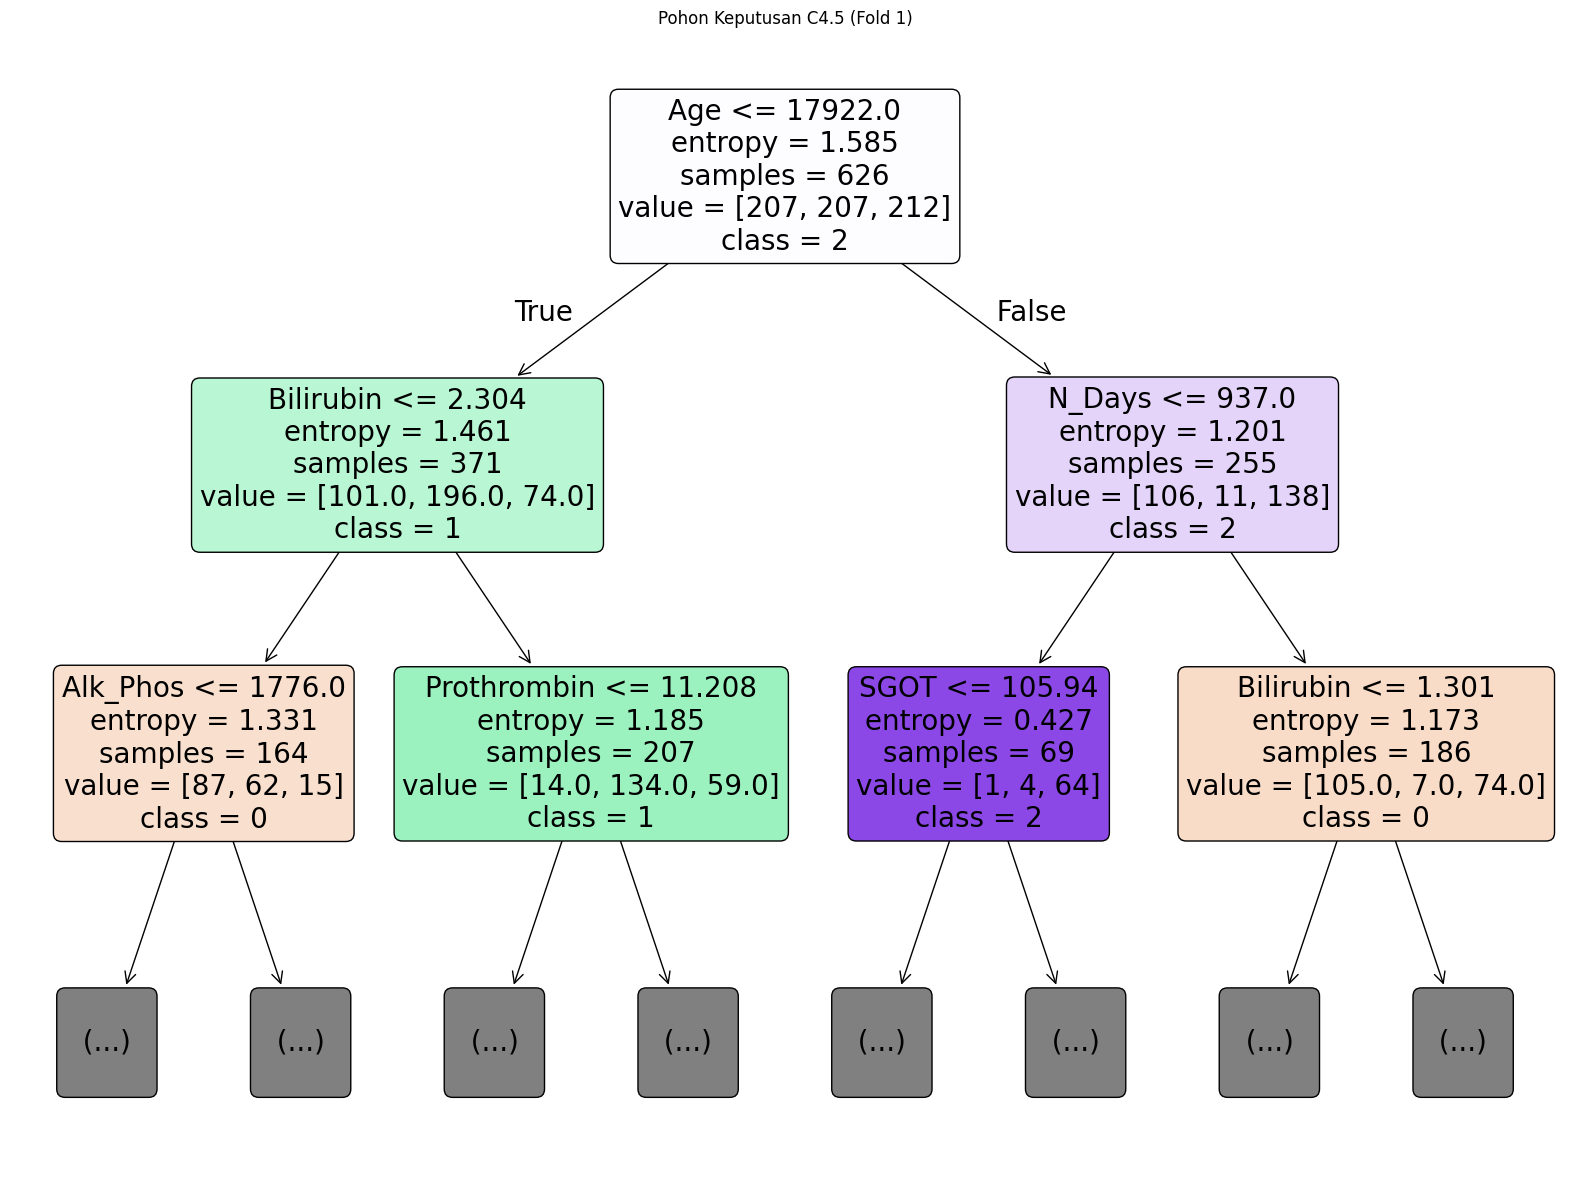

In [63]:
print("OUTPUT IMPLEMENTASI MODEL C4.5 TUNGGAL (Contoh Fold 1)")
print("\n Visualisasi Pohon Keputusan (Diagram Pohon)")

plt.figure(figsize=(20, 15))
plot_tree(
    representative_model,
    feature_names=feature_names,
    fontsize = 20,
    max_depth = 2,
    class_names=representative_model.classes_.astype(str),
    filled=True,
    rounded=True
)
plt.title("Pohon Keputusan C4.5 (Fold 1)")
plt.show()

In [64]:
print("HASIL EVALUASI TIAP FOLD (C4.5 Tunggal)")
for result_str in fold_results_strings:
    print(result_str)

HASIL EVALUASI TIAP FOLD (C4.5 Tunggal)

========== Fold 1 ==========
Akurasi Fold: 0.7714285714285715
Precision: 0.7965876229034123
Recall: 0.7714285714285715
F1-Score: 0.774816487859966
Confusion Matrix:
 [[19  1  5]
 [ 3 18  4]
 [ 3  0 17]]

========== Fold 2 ==========
Akurasi Fold: 0.6857142857142857
Precision: 0.6866910866910867
Recall: 0.6857142857142857
F1-Score: 0.6848831168831169
Confusion Matrix:
 [[18  3  8]
 [ 1 14  2]
 [ 7  1 16]]

========== Fold 3 ==========
Akurasi Fold: 0.7571428571428571
Precision: 0.7674376058723885
Recall: 0.7571428571428571
F1-Score: 0.7597049689440993
Confusion Matrix:
 [[16  1  4]
 [ 2 21  2]
 [ 7  1 16]]

========== Fold 4 ==========
Akurasi Fold: 0.7857142857142857
Precision: 0.7837662337662337
Recall: 0.7857142857142857
F1-Score: 0.7845421245421246
Confusion Matrix:
 [[15  2  6]
 [ 2 13  0]
 [ 5  0 27]]

========== Fold 5 ==========
Akurasi Fold: 0.7142857142857143
Precision: 0.7200236616385685
Recall: 0.7142857142857143
F1-Score: 0.716233766

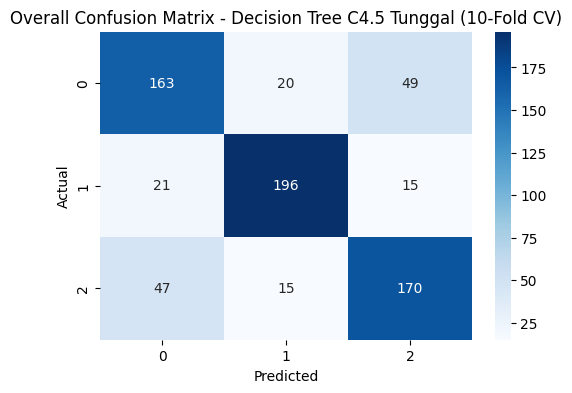

In [65]:
cm_overall = confusion_matrix(all_true, all_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_overall, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix - Decision Tree C4.5 Tunggal (10-Fold CV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [66]:
cm_overall

array([[163,  20,  49],
       [ 21, 196,  15],
       [ 47,  15, 170]], dtype=int64)

In [67]:
print("Akurasi rata-rata:", np.mean(fold_accuracies))
print("Precision rata-rata:", np.mean(fold_precisions))
print("Recall rata-rata:", np.mean(fold_recalls))
print("F1 rata-rata:", np.mean(fold_f1s))

Akurasi rata-rata: 0.7601449275362319
Precision rata-rata: 0.7676750226837397
Recall rata-rata: 0.7601449275362319
F1 rata-rata: 0.7601859349741804


# 4. MODELING DAN EVALUASI C4.5 DENGAN BAGGING

### 4.1. K-Fold Cross Validation ( K = 10)

In [68]:
feature_names = X_res.columns.tolist()
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### 4.2. Mulai Training dan Evaluasi

In [69]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
fold_confusions = []

all_true = []
all_pred = []
representative_model = None
fold_results_strings2 = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_res), 1):

    X_train, X_test = X_res.iloc[train_idx], X_res.iloc[test_idx]
    y_train, y_test = y_res.iloc[train_idx], y_res.iloc[test_idx]

    ###### Bagging (Bootstrap 10 kali) #####
    n_bootstrap = 10
    models = []

    for i in range(n_bootstrap):
        sample_idx = np.random.choice(len(X_train), len(X_train), replace=True)
        X_boot = X_train.iloc[sample_idx]
        y_boot = y_train.iloc[sample_idx]

        model = DecisionTreeClassifier(criterion="entropy", random_state=i)
        model.fit(X_boot, y_boot)
        models.append(model)

    # Simpan model Fold 1 sebagai representasi (ambil model terakhir dari ensemble)
    if fold == 1:
        representative_model = model # model adalah model C4.5 terakhir yang dilatih di ensemble
        X_train_fold1 = X_train
        y_train_fold1 = y_train

    ##### Majority Voting #####
    predictions = []
    for m in models:
        pred = m.predict(X_test)
        predictions.append(pred)

    predictions = np.array(predictions)

    final_pred = []
    for col in predictions.T:
        vals, counts = np.unique(col, return_counts=True)
        final_pred.append(vals[np.argmax(counts)])

    final_pred = np.array(final_pred)

    #Evaluasi Fold #
    acc = accuracy_score(y_test, final_pred)
    prec = precision_score(y_test, final_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, final_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, final_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, final_pred)

    # MEMBUAT STRING HASIL PER FOLD
    result_str2 = f"\n========== Fold {fold} ==========\n"
    result_str2 += f"Akurasi Fold: {acc}\n"
    result_str2 += f"Precision: {prec}\n"
    result_str2 += f"Recall: {rec}\n"
    result_str2 += f"F1-Score: {f1}\n"
    result_str2 += f"Confusion Matrix:\n {cm}"
    fold_results_strings2.append(result_str2) # SIMPAN STRING

    # Simpan nilai metrik ke list
    fold_accuracies.append(acc)
    fold_precisions.append(prec)
    fold_recalls.append(rec)
    fold_f1s.append(f1)
    fold_confusions.append(cm)

    # Simpan untuk confusion matrix total
    all_true.extend(y_test)
    all_pred.extend(final_pred)


OUTPUT IMPLEMENTASI MODEL C4.5 DENGAN BAGGING (Contoh Fold 1)

 Visualisasi Pohon Keputusan (Diagram Pohon)


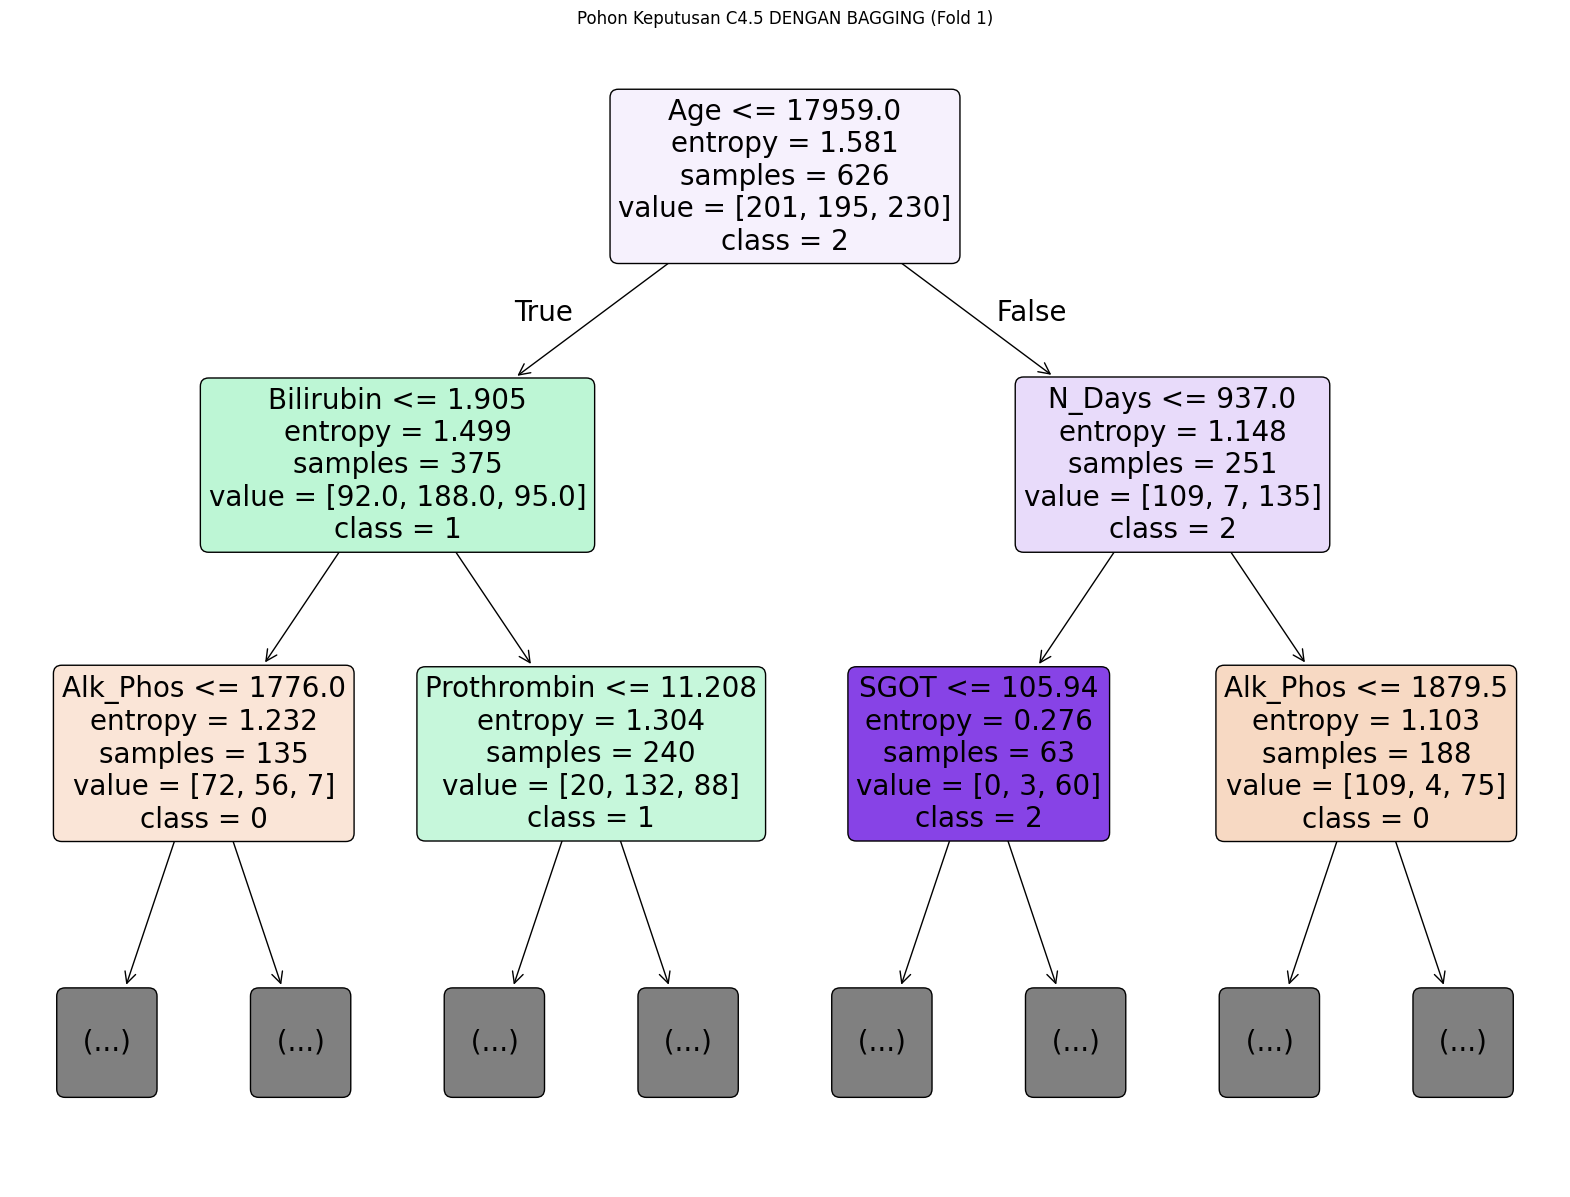

In [70]:
print("OUTPUT IMPLEMENTASI MODEL C4.5 DENGAN BAGGING (Contoh Fold 1)")

print("\n Visualisasi Pohon Keputusan (Diagram Pohon)")

plt.figure(figsize=(20, 15))
plot_tree(
    representative_model,
    feature_names=feature_names,
    fontsize = 20,
    max_depth = 2,
    class_names=representative_model.classes_.astype(str),
    filled=True,
    rounded=True
)
plt.title("Pohon Keputusan C4.5 DENGAN BAGGING (Fold 1)")
plt.show()

In [71]:
print("HASIL EVALUASI TIAP FOLD (C4.5 + Bagging)")
for result_str2 in fold_results_strings2:
    print(result_str2)

HASIL EVALUASI TIAP FOLD (C4.5 + Bagging)

========== Fold 1 ==========
Akurasi Fold: 0.7714285714285715
Precision: 0.797952047952048
Recall: 0.7714285714285715
F1-Score: 0.7790405708999604
Confusion Matrix:
 [[18  0  7]
 [ 0 21  4]
 [ 4  1 15]]

========== Fold 2 ==========
Akurasi Fold: 0.8428571428571429
Precision: 0.8430952380952381
Recall: 0.8428571428571429
F1-Score: 0.8391906764788121
Confusion Matrix:
 [[25  1  3]
 [ 0 17  0]
 [ 5  2 17]]

========== Fold 3 ==========
Akurasi Fold: 0.8285714285714286
Precision: 0.8335403726708074
Recall: 0.8285714285714286
F1-Score: 0.8300324675324675
Confusion Matrix:
 [[17  1  3]
 [ 3 21  1]
 [ 3  1 20]]

========== Fold 4 ==========
Akurasi Fold: 0.8285714285714286
Precision: 0.8414210128495843
Recall: 0.8285714285714286
F1-Score: 0.8316190476190477
Confusion Matrix:
 [[19  2  2]
 [ 2 13  0]
 [ 6  0 26]]

========== Fold 5 ==========
Akurasi Fold: 0.8428571428571429
Precision: 0.8401831501831502
Recall: 0.8428571428571429
F1-Score: 0.8397440

### 4.3. Hasil Akhir

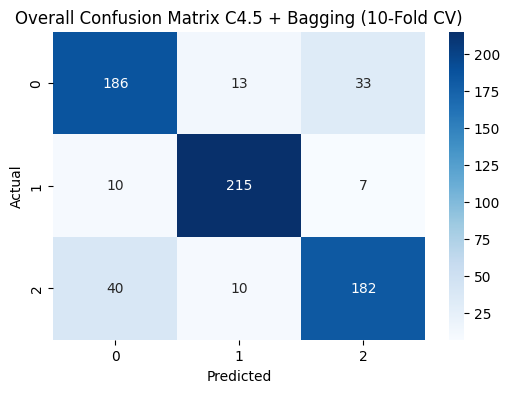

In [72]:
cm_overall = confusion_matrix(all_true, all_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_overall, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix C4.5 + Bagging (10-Fold CV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [73]:
cm_overall

array([[186,  13,  33],
       [ 10, 215,   7],
       [ 40,  10, 182]], dtype=int64)

In [74]:
print("Akurasi rata-rata:", np.mean(fold_accuracies))
print("Precision rata-rata:", np.mean(fold_precisions))
print("Recall rata-rata:", np.mean(fold_recalls))
print("F1 rata-rata:", np.mean(fold_f1s))

Akurasi rata-rata: 0.8377225672877847
Precision rata-rata: 0.84802431980514
Recall rata-rata: 0.8377225672877847
F1 rata-rata: 0.8380473659411456


In [76]:
import pickle

with open("c45_bagging.pkl", "wb") as f:
    pickle.dump(models, f)
